#Improving Deep Neural Networks: Hyperparameter tuning, Regularization and Optimization

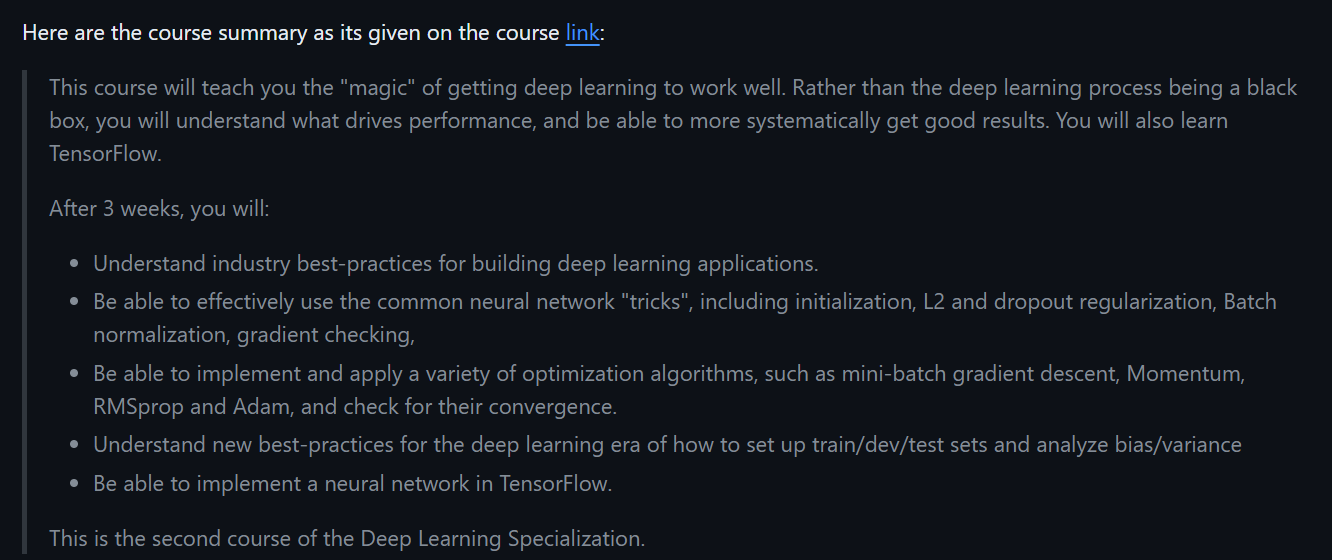

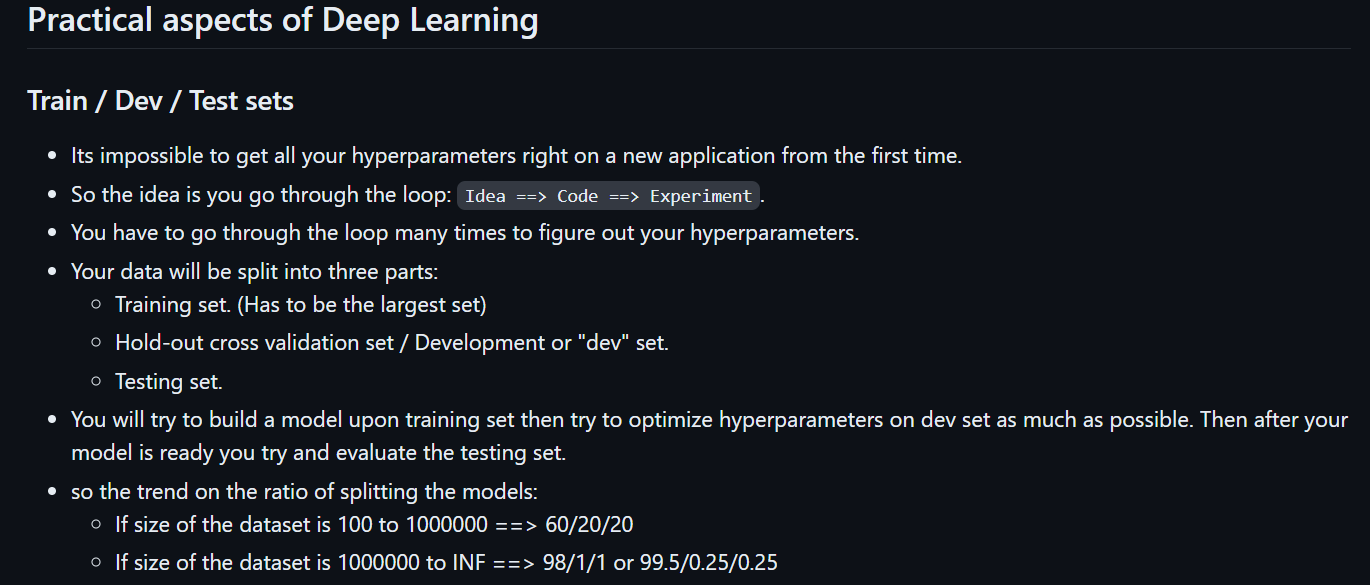

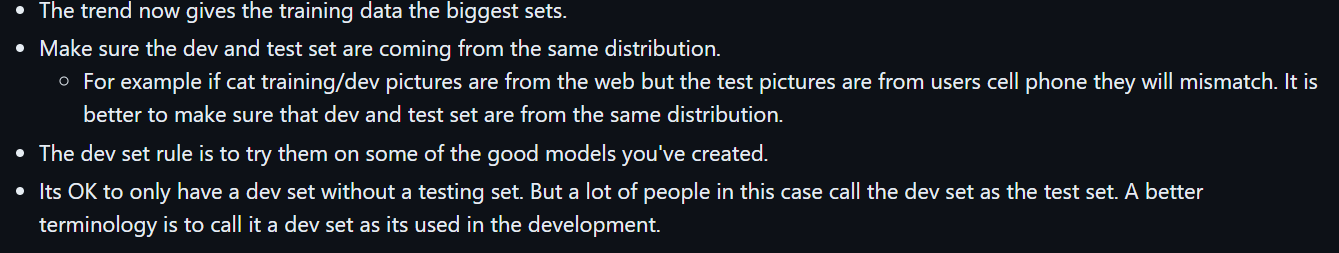

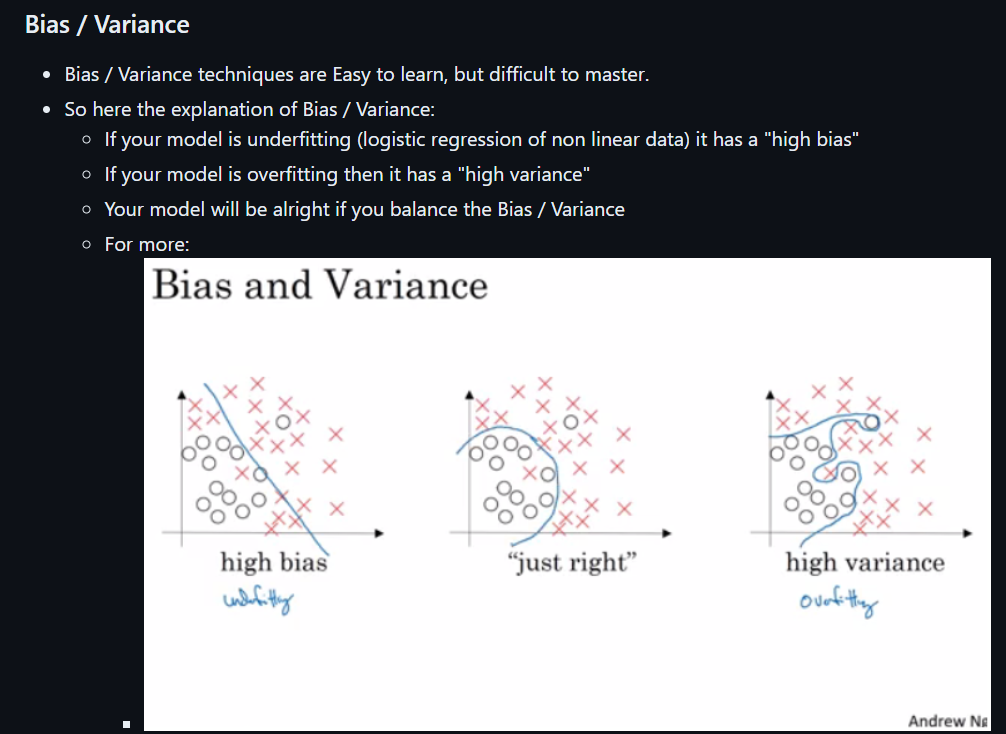

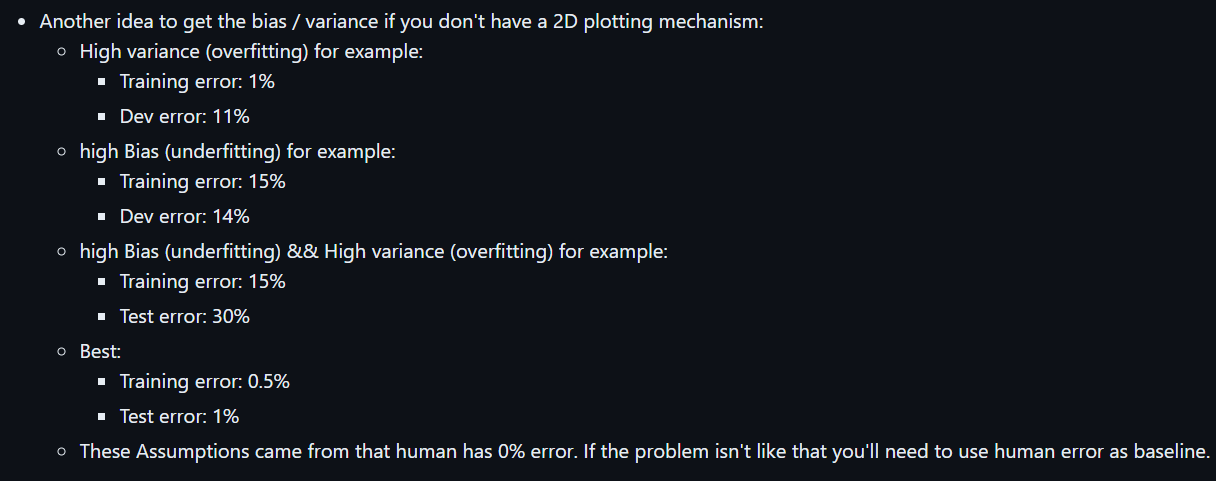

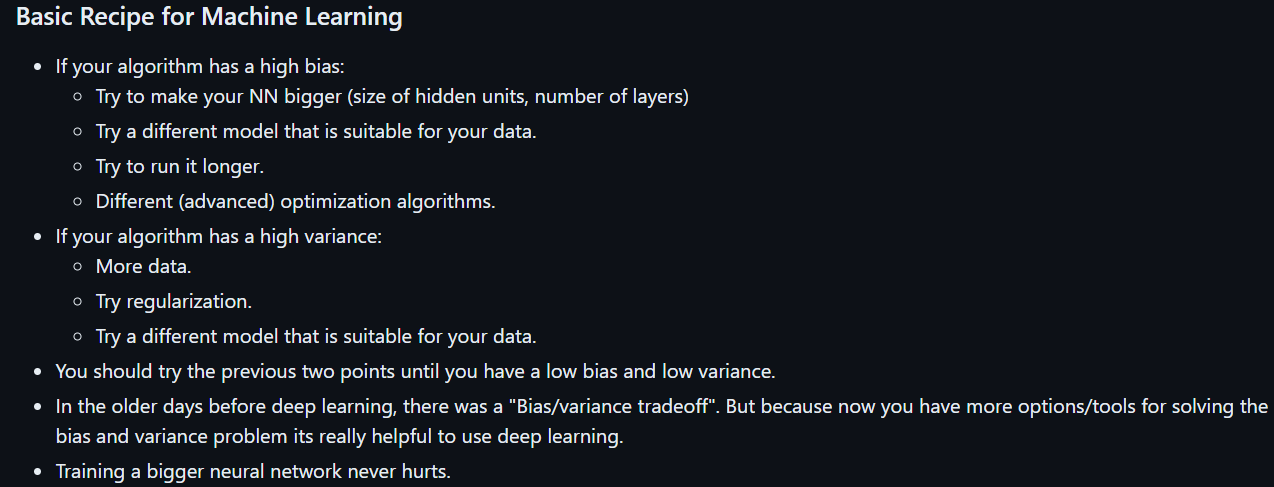

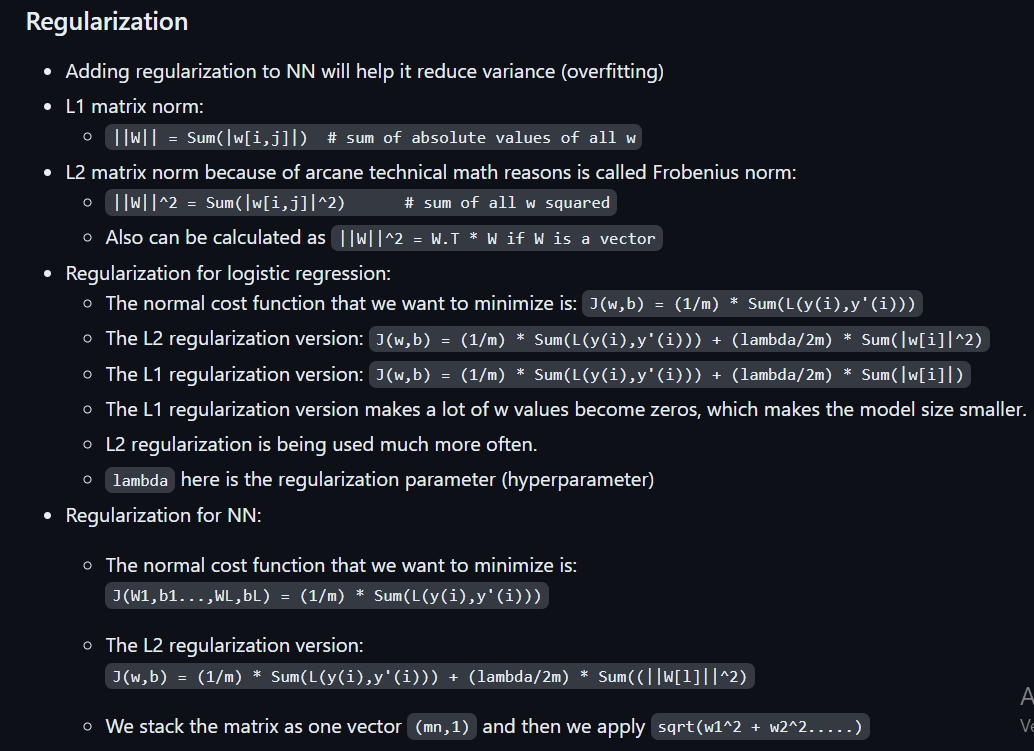

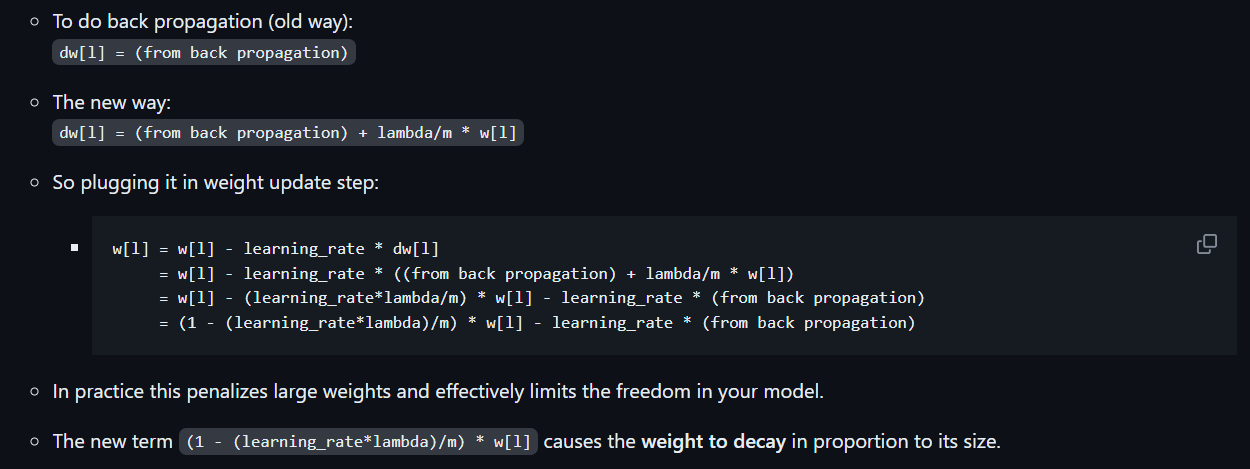

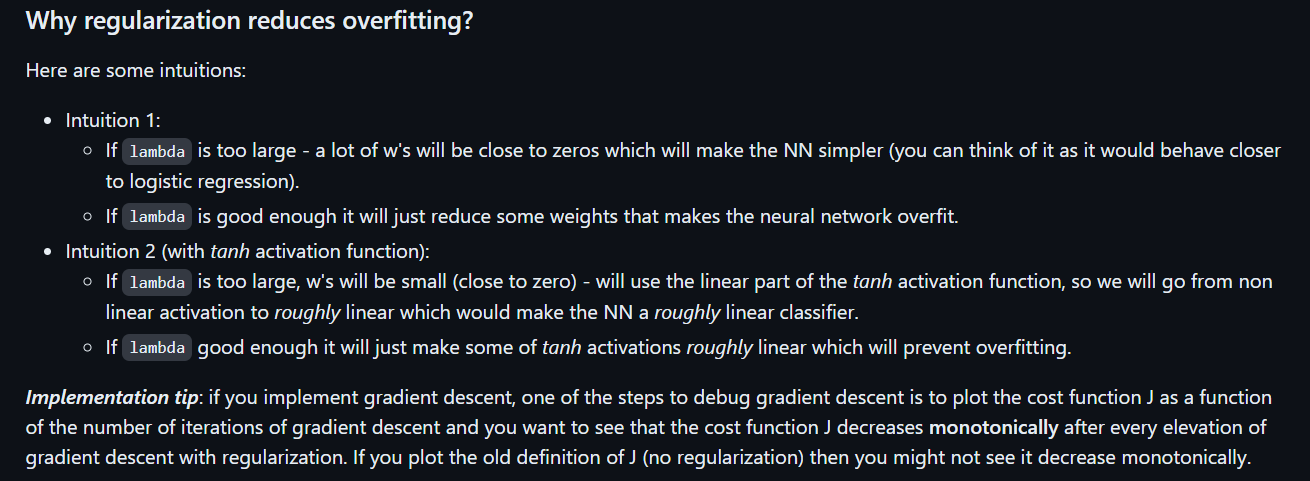

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l1, l2

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 49s 56ms/step - loss: 0.3562 - accuracy: 0.9367 - val_loss: 0.1926 - val_accuracy: 0.9828
Epoch 2/5
844/844 [==============================] - 45s 53ms/step - loss: 0.1847 - accuracy: 0.9774 - val_loss: 0.1562 - val_accuracy: 0.9832
Epoch 3/5
844/844 [==============================] - 45s 53ms/step - loss: 0.1478 - accuracy: 0.9815 - val_loss: 0.1266 - val_accuracy: 0.9855
Epoch 4/5
844/844 [==============================] - 43s 51ms/step - loss: 0.1289 - accuracy: 0.9835 - val_loss: 0.1120 - val_accuracy: 0.9872
Epoch 5/5
844/844 [==============================] - 43s 51ms/step - loss: 0.1207 - accuracy: 0.9837 - val_loss: 0.1059 - val_accuracy: 0.9895


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 3s 8ms/step - loss: 0.1011 - accuracy: 0.9898
Test accuracy: 0.989799976348877


In [ ]:
# Define the CNN model with L1 regularization
model_l1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l1(0.001), input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.001)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(10, activation='softmax')
])

# Compile the model
model_l1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
# Train the model
history = model_l1.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model_l1.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/5
844/844 [==============================] - 44s 51ms/step - loss: 1.2260 - accuracy: 0.9005 - val_loss: 0.5705 - val_accuracy: 0.9628
Epoch 2/5
844/844 [==============================] - 45s 54ms/step - loss: 0.4862 - accuracy: 0.9538 - val_loss: 0.4038 - val_accuracy: 0.9577
Epoch 3/5
844/844 [==============================] - 42s 50ms/step - loss: 0.3697 - accuracy: 0.9600 - val_loss: 0.3188 - val_accuracy: 0.9727
Epoch 4/5
844/844 [==============================] - 42s 50ms/step - loss: 0.3261 - accuracy: 0.9639 - val_loss: 0.3028 - val_accuracy: 0.9673
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.2947 - accuracy: 0.9667
Test accuracy: 0.96670001745224


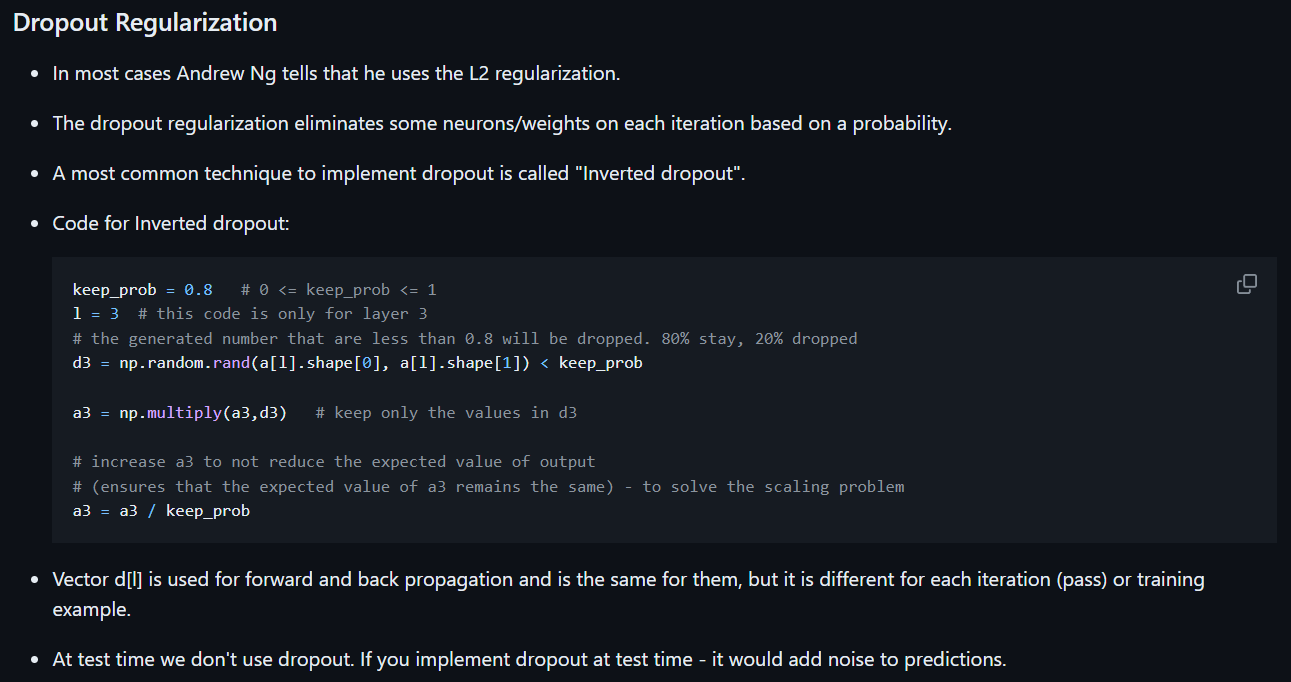

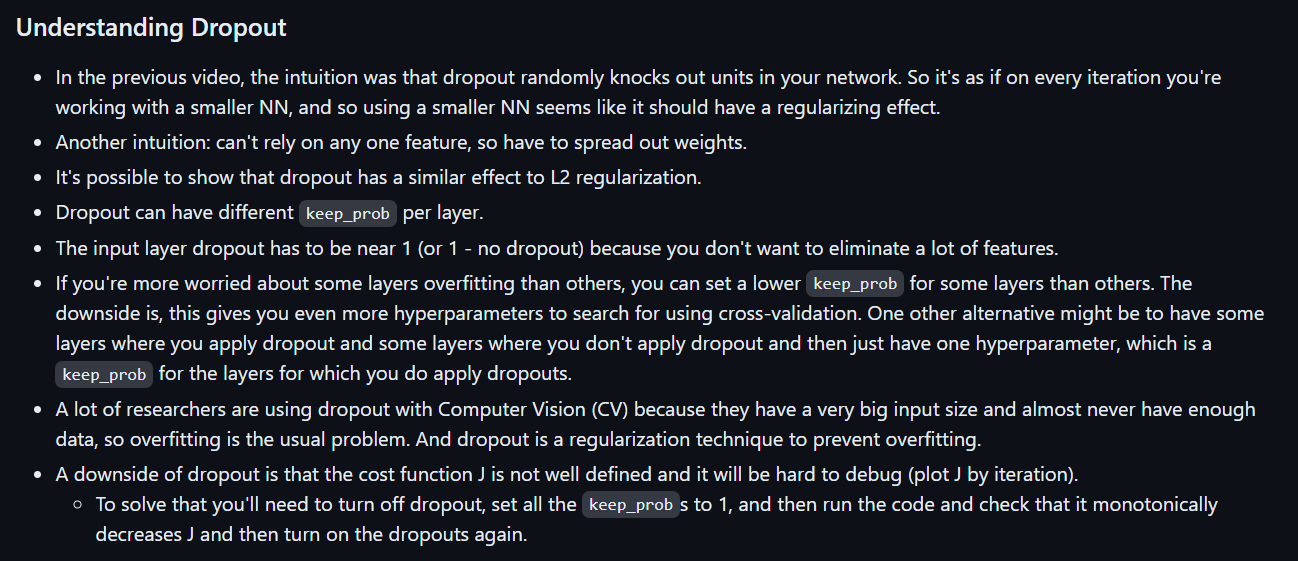

In [ ]:
from tensorflow.keras.layers import Dropout


# Define the CNN model with Dropout regularization
model_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% dropout rate
    Dense(10, activation='softmax')
])

# Compile the model
model_dropout.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [ ]:
# Train the model
history = model_dropout.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model_dropout.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/5
844/844 [==============================] - 45s 53ms/step - loss: 0.1853 - accuracy: 0.9462 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 2/5
844/844 [==============================] - 45s 53ms/step - loss: 0.0998 - accuracy: 0.9726 - val_loss: 0.0422 - val_accuracy: 0.9870
Epoch 3/5
844/844 [==============================] - 43s 51ms/step - loss: 0.0750 - accuracy: 0.9793 - val_loss: 0.0304 - val_accuracy: 0.9912
Epoch 4/5
844/844 [==============================] - 44s 52ms/step - loss: 0.0576 - accuracy: 0.9838 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0358 - accuracy: 0.9896
Test accuracy: 0.9896000027656555


In [ ]:
# Define the CNN model with Inverted Dropout
model_inverse_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5)  # Dropout layer with 50% dropout rate (inverted dropout)
])

# Add output layer
model_inverse_dropout.add(Dense(10, activation='softmax'))

# Compile the model
model_inverse_dropout.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model_inverse_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [ ]:
# Train the model
history = model_inverse_dropout.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model_inverse_dropout.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/5
844/844 [==============================] - 43s 51ms/step - loss: 0.1282 - accuracy: 0.9638 - val_loss: 0.0551 - val_accuracy: 0.9827
Epoch 2/5
844/844 [==============================] - 43s 51ms/step - loss: 0.0889 - accuracy: 0.9749 - val_loss: 0.0444 - val_accuracy: 0.9872
Epoch 3/5
844/844 [==============================] - 46s 55ms/step - loss: 0.0657 - accuracy: 0.9809 - val_loss: 0.0377 - val_accuracy: 0.9892
Epoch 4/5
844/844 [==============================] - 43s 51ms/step - loss: 0.0546 - accuracy: 0.9837 - val_loss: 0.0406 - val_accuracy: 0.9880
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0280 - accuracy: 0.9911
Test accuracy: 0.991100013256073
